In [ ]:
# Filename : Multivariate_Analysis 
# 
# Purpose/Description : find Multivariate_Analysis using
# 
# Author : Hrushikesh Pradhan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
print('Sahpe of df:', tips.shape)
tips.head(2)

Sahpe of df: (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [5]:
titanic = pd.read_csv("/home/hrushikesh/Downloads/train(1).csv")

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
flights = sns.load_dataset('flights')

In [8]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [9]:
iris = sns.load_dataset('iris')

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1. Scatterplot (Numerical - Numerical)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

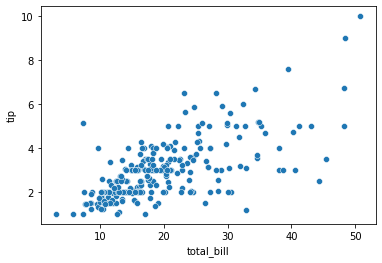

In [12]:
sns.scatterplot(tips['total_bill'],tips['tip']) #bi-variate

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

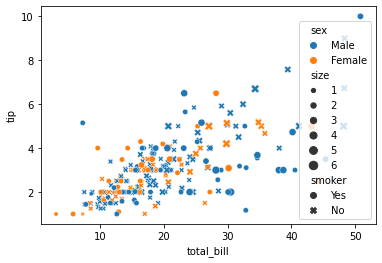

In [14]:
sns.scatterplot(tips['total_bill'],
                tips['tip'],
                hue=tips['sex'],
                style=tips['smoker'],
                size=tips['size']) #multi-variate

# 2. Bar Plot (Numerical - Categorical)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

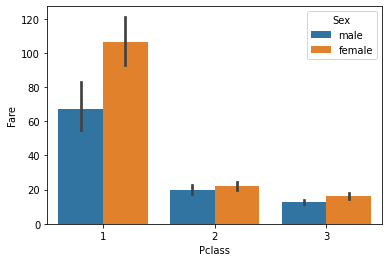

In [16]:
sns.barplot(titanic['Pclass'],
            titanic['Fare'],
            hue=titanic['Sex'])

# 3. Box Plot

<AxesSubplot:xlabel='Sex', ylabel='Age'>

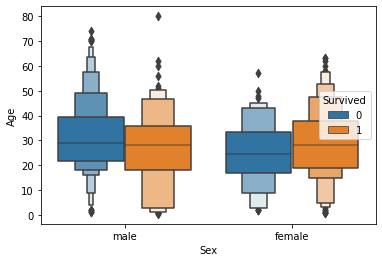

In [19]:
sns.boxenplot(titanic['Sex'],titanic['Age'],hue=titanic['Survived'])

# 4. Distplot (Numerical - Categorical)

<AxesSubplot:xlabel='Age', ylabel='Density'>

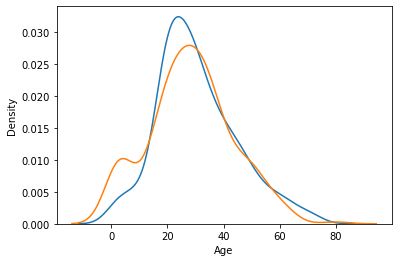

In [20]:
sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False)
sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False)

# 5. HeatMap (Categorical - Categorical)

In [22]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

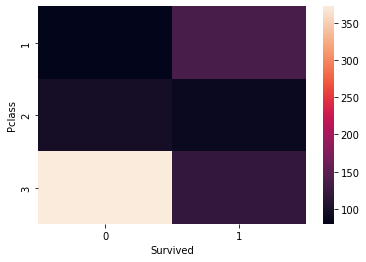

In [24]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

In [26]:
(titanic.groupby('Pclass').mean()['Survived']*100)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [28]:
(titanic.groupby('Sex').mean()['Survived']*100)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

# 6. Cluster (Categorical - Categorical)

In [32]:
pd.crosstab(titanic['SibSp'],titanic['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


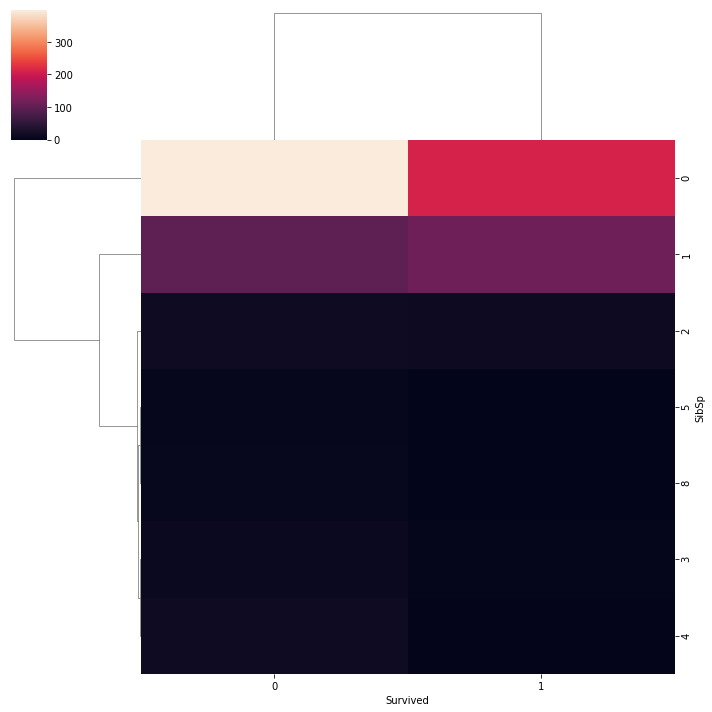

In [34]:
sns.clustermap(pd.crosstab(titanic['SibSp'],titanic['Survived']))

# 7. Pair plot

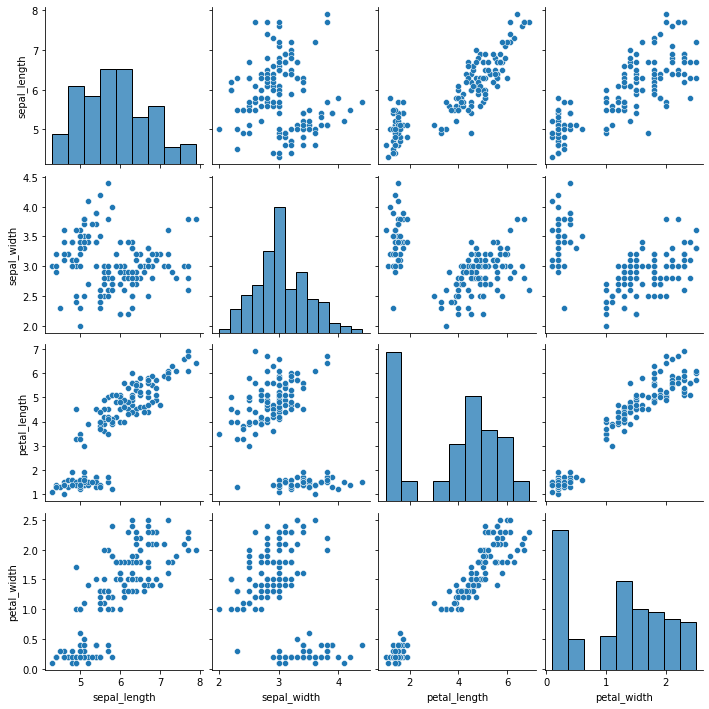

In [35]:
sns.pairplot(iris)

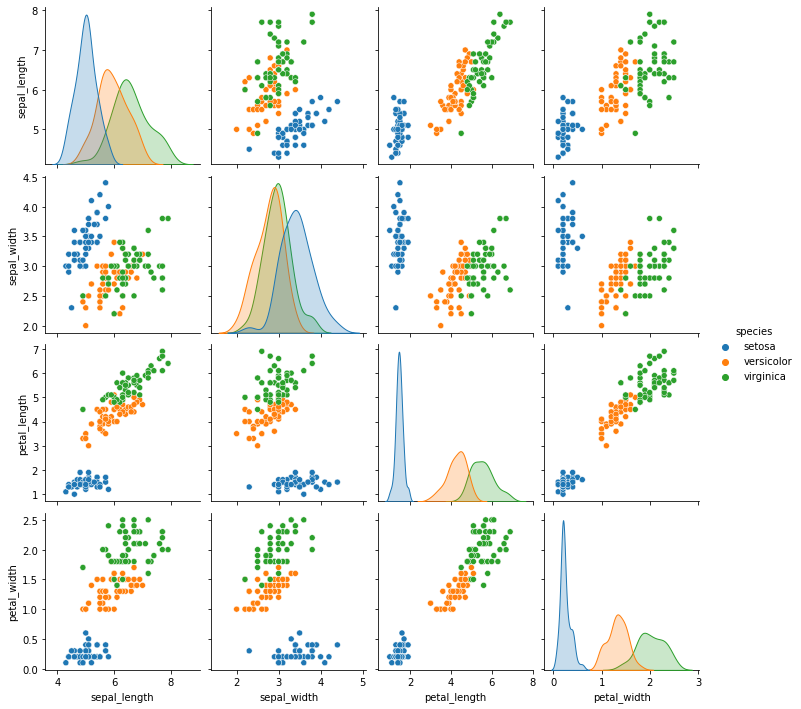

In [36]:
sns.pairplot(iris,hue = 'species')

# 8. Line Plot

In [37]:
new = flights.groupby('year').sum().reset_index()

<AxesSubplot:xlabel='year', ylabel='passengers'>

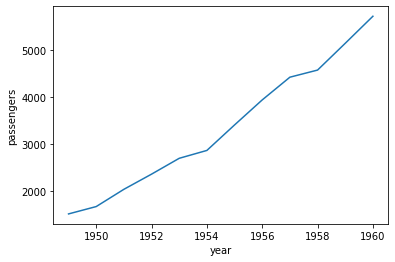

In [38]:
sns.lineplot(new['year'],new['passengers'])

In [39]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

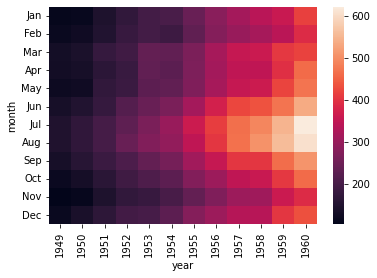

In [40]:
sns.heatmap(flights.pivot_table(values='passengers',
                                index='month',
                                columns='year'))

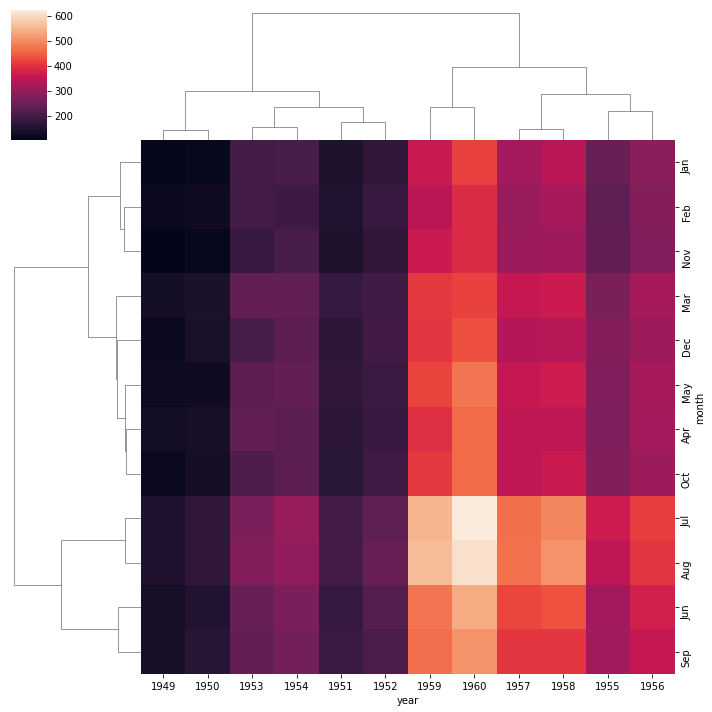

In [41]:
sns.clustermap(flights.pivot_table(values='passengers',
                                    index='month',
                                    columns='year'))

In [ ]:
# Thq...